In [392]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import math

In [393]:
df = pd.read_csv(r"D:\Data Analysis\Assignments\Census-Income-project-Extra-Data-sets\census-income (7).csv")

In [394]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [395]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
6661,51,Federal-gov,306784,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,4386,0,40,United-States,>50K
23082,38,Self-emp-not-inc,184456,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,3464,0,80,Italy,<=50K
24914,58,Private,209438,Some-college,10,Divorced,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
21637,55,Self-emp-not-inc,194065,Assoc-acdm,12,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
25555,43,State-gov,78765,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Male,0,0,40,United-States,<=50K


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [397]:
df.rename(columns={df.columns[14]:'annual_income'},inplace=True)

In [398]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'annual_income'],
      dtype='object')

In [399]:
df.columns = df.columns.str.replace(' ','')

In [400]:
df.columns = df.columns.str.replace('-','.')

In [401]:
df1 = df.iloc[:,[1,6,13]]
s=0
for i in df1.columns:
    x=len(df1[df1[i]==' ?'])
    s+=x
print(s)

4262


In [402]:
df.replace(' ?',np.nan,inplace=True)

In [403]:
df=df.dropna()

In [404]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [405]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
annual_income     0
dtype: int64

In [406]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [407]:
census_ed = df[['education']]

In [408]:
census_ed.head()

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors


In [409]:
census_seq = df.iloc[:,:8]

In [410]:
census_seq.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


In [411]:
census_col = df.iloc[:,[5,8,11]]

In [412]:
census_col.head()

,marital.status,race,capital.loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0


In [413]:
male_gov = df[(df['sex']==' Male') & (df['workclass']==' State-gov')]

In [414]:
male_gov

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


In [415]:
census_us = df[(df.age==39) & ((df.education==' Bachelors') | (df['native.country']==' United-States'))]

In [416]:
census_us

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


In [417]:
census_200 = df.sample(200)

In [418]:
census_200

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
647,71,Private,78277,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,15,United-States,<=50K
1037,37,Private,123785,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,75,United-States,<=50K
24511,68,Private,218637,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,2377,55,United-States,>50K
5752,33,Private,292465,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K
18690,34,Private,167474,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,40,Private,229148,12th,8,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,40,Jamaica,<=50K
21172,58,Private,34788,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1887,40,United-States,>50K
644,31,Private,55849,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
23300,20,Private,179423,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,8,United-States,<=50K


In [419]:
df.workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [420]:
df['capital.gain'].groupby(df['workclass']).mean()

workclass
 Federal-gov          832.321315
 Local-gov            829.230285
 Private              879.858207
 Self-emp-inc        4810.746741
 Self-emp-not-inc    1913.134454
 State-gov            684.306489
 Without-pay          487.857143
Name: capital.gain, dtype: float64

In [421]:
df['annual_income'].value_counts()

 <=50K    22654
 >50K      7508
Name: annual_income, dtype: int64

In [422]:
df_g50 = df[df['annual_income']==' >50K']

In [423]:
df_g50

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [424]:
pri_l50 = len(df[(df['native.country']==' United-States')&((df['annual_income']==' <=50K') & (df['workclass']==' Private'))])

In [425]:
pri_l50

15594

In [426]:
per = (pri_l50 / len(df))*100

In [427]:
per

51.70081559578277

In [428]:
df['marital.status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital.status, dtype: int64

In [429]:
married = 14065 + 370 + 21
percent = (married/len(df['marital.status']))*100
percent

47.92785624295471

In [430]:
hsgrad_g50 = len(df[(df['education']==' HS-grad') & (df['annual_income']== ' >50K')])

In [431]:
per_hsgrad = (hsgrad_g50/len(df))*100

In [432]:
per_hsgrad

5.361050328227571

# Linear Regression 

In [433]:
X = df['hours.per.week']
y = df['education.num']

In [434]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [435]:
X_train

15977    40
13574    60
23210    32
9284     60
8841     52
         ..
14169    40
21206    50
10646    45
11687    60
2976     35
Name: hours.per.week, Length: 21113, dtype: int64

In [436]:
y_train

15977     9
13574    10
23210     9
9284     10
8841     10
         ..
14169    16
21206    14
10646    13
11687    13
2976      9
Name: education.num, Length: 21113, dtype: int64

In [437]:
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [438]:
lr = LinearRegression()

In [439]:
lr.fit(X_train,y_train)

LinearRegression()

In [440]:
y_pred = lr.predict(X_test)

In [441]:
lr.predict([[45]])

array([10.24262789])

In [442]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

In [443]:
print(rmse)

2.5201089820094165


# Logistic Regression

In [444]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
df['occupation'] = L.fit_transform(df['occupation'])
df['annual_income'] = L.fit_transform(df['annual_income'])

In [445]:
df['occupation'].value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1966
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [446]:
df['annual_income'].value_counts()

0    22654
1     7508
Name: annual_income, dtype: int64

In [447]:
X = df['occupation']
y = df['annual_income']

In [448]:
lor = LogisticRegression()

In [449]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=0)

In [450]:
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [451]:
lor.fit(X_train,y_train)

LogisticRegression()

In [452]:
y_pred=lor.predict(X_test)

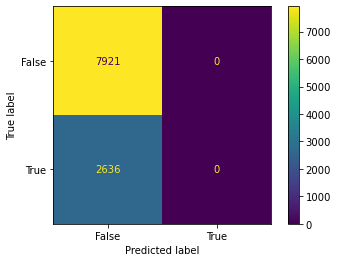

In [453]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [454]:
accuracy_score(y_pred,y_test)*100

75.0307852609643

# Multiple Logistic Regression

In [455]:
df['education'] = L.fit_transform(df['education'])
df['workclass'] = L.fit_transform(df['workclass'])

In [456]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
0,39,5,77516,9,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,4,83311,9,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,0
2,38,2,215646,11,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,0
3,53,2,234721,1,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,0
4,28,2,338409,9,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,2,154374,11,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,2,151910,11,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,2,201490,11,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0


In [457]:
X = df.iloc[:,[0,1,6]]
y = df['annual_income']

In [458]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [459]:
y_train.shape

(24129,)

In [460]:
X_train.shape

(24129, 3)

In [461]:
lor.fit(X_train,y_train)

LogisticRegression()

In [462]:
y_pred = lor.predict(X_test)

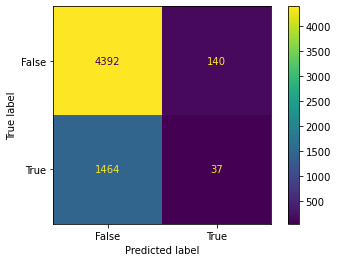

In [463]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [464]:
accuracy_score(y_pred,y_test)*100

73.41289574009615

# Decision Tree

In [465]:
cat_variables = [i for i in df.columns if df[i].dtype=='object']

In [466]:
cat_variables

['marital.status', 'relationship', 'race', 'sex', 'native.country']

In [472]:
census_ed.value_counts()

education    
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
dtype: int64

In [478]:
census_ed=census_ed.replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')

In [479]:
census_ed = census_ed.replace([' Assoc-voc',' Assoc-acdm',' Prof-school',' Some-college'],'Higher')

In [480]:
census_ed

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,School
4,Bachelors
...,...
32556,Higher
32557,HS-grad
32558,HS-grad
32559,HS-grad


In [481]:
df['education'] = census_ed

In [484]:
df['marital.status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital.status, dtype: int64

In [488]:
df['marital.status'] = df['marital.status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'married')
df['marital.status'] = df['marital.status'].replace([' Never-married'],'not-married')
df['marital.status'] = df['marital.status'].replace([' Divorced',' Separated',' Widowed',' Married-spouse-absent'],'other')

In [490]:
for i in cat_variables:
    df[i] = L.fit_transform(df[i])

In [494]:
df.education = L.fit_transform(df.education)

In [496]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
0,39,5,77516,0,13,1,0,1,4,1,2174,0,40,38,0
1,50,4,83311,0,13,0,3,0,4,1,0,0,13,38,0
2,38,2,215646,2,9,2,5,1,4,1,0,0,40,38,0
3,53,2,234721,5,7,0,5,0,2,1,0,0,40,38,0
4,28,2,338409,0,13,0,9,5,2,0,0,0,40,4,0


In [497]:
X = df.iloc[:,:14]
y = df.iloc[:,14]

In [498]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [499]:
dt = DecisionTreeClassifier()

In [501]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [502]:
y_pred = dt.predict(X_test)

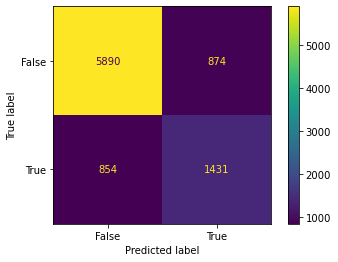

In [503]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [504]:
accuracy_score(y_pred,y_test)*100

80.90396728920322

# Random Forest

In [505]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [506]:
rf = RandomForestClassifier()

In [507]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [508]:
y_pred=rf.predict(X_test)

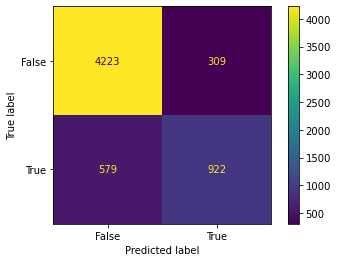

In [509]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [510]:
accuracy_score(y_pred,y_test)*100

85.28095474888116